In [51]:
from datascience import *
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib as plt
%matplotlib inline

import seaborn as sns
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import zipfile
from pathlib import Path
import re

#### Going to remove the `wkswor` column because all of the 2017 values are `nan`, then we are going to divide the drop all values that are `nan`, then we are going to divide the data into 2007 & 2017, and we'll create a sample of size $ n = 100,000 $ from each table   

In [2]:
original_data =  pd.read_csv('113Adata.csv')

#almost all missing values for years in 2017, so drop that column
original_data = original_data.drop(columns = ['wkswork1'])

#filter out missing values (NaNs) to produce clean dataframe
cleaned = original_data.dropna()

#reduce file size by performing stratified sampling on year, randomly select 160K rows from each year
sampled = cleaned.groupby('year', group_keys=False).apply(lambda x: x.sample(160000))

#export the dataframe as a csv file
export_csv = sampled.to_csv('cp113.csv', index = None, header=True)

In [5]:
sampled = sampled.reset_index()

### Let's divide our data into different years, one for 2007 and one for 2017.

In [112]:
data = Table().from_df(sampled, keep_index=False).drop(0)

occupations = "0000 N/A (less than 16 years old/unemployed who never worked/NILF who last worked more than 5 years ago) Agriculture, Forestry, Fishing and Hunting, and Mining Agriculture, Forestry, Fishing, and Hunting 0170 Crop production 0180 Animal production and aquaculture 0190 Forestry except logging 0270 Logging 0280 Fishing, hunting and trapping 0290 Support activities for agriculture and forestry Mining, Quarrying, and Oil and Gas Extraction 0370 Oil and gas extraction 0380 Coal mining 0390 Metal ore mining 0470 Nonmetallic mineral mining and quarrying 0490 Support activities for mining Construction 0770 Construction (the cleaning of buildings and dwellings is incidental during construction and immediately after construction) Manufacturing 1070 Animal food, grain and oilseed milling 1080 Sugar and confectionery products 1090 Fruit and vegetable preserving and specialty food manufacturing 1170 Dairy product manufacturing 1180 Animal slaughtering and processing 1190 Retail bakeries 1270 Bakeries and tortillerias, except retail bakeries 1280 Seafood and other miscellaneous foods, n.e.c. 1290 Not specified food industries 1370 Beverage manufacturing 1390 Tobacco manufacturing 1470 Fiber, yarn, and thread mills 1480 Fabric mills, except knitting mills 1490 Textile and fabric finishing and coating mills 1570 Carpet and rug mills 1590 Textile product mills, except carpets and rugs 1670 Knitting fabric mills, and apparel knitting mills 1680 Cut and sew apparel manufacturing 1690 Apparel accessories and other apparel manufacturing 1770 Footwear manufacturing 1790 Leather tanning and finishing, and other allied products manufacturing 1870 Pulp, paper, and paperboard mills 1880 Paperboard container manufacturing 1890 Miscellaneous paper and pulp products 1990 Printing and related support activities 2070 Petroleum refining 2090 Miscellaneous petroleum and coal products 2170 Resin, synthetic rubber, and fibers and filaments manufacturing 2180 Agricultural chemical manufacturing 2190 Pharmaceutical and medicine manufacturing 2270 Paint, coating, and adhesive manufacturing 2280 Soap, cleaning compound, and cosmetics manufacturing 2290 Industrial and miscellaneous chemicals 2370 Plastics product manufacturing 2380 Tire manufacturing 2390 Rubber products, except tires, manufacturing 2470 Pottery, ceramics, and plumbing fixture manufacturing 2480 Clay building material and refractories manufacturing 2490 Glass and glass product manufacturing 2570 Cement, concrete, lime, and gypsum product manufacturing 2590 Miscellaneous nonmetallic mineral product manufacturing 2670 Iron and steel mills and steel product manufacturing 2680 Aluminum production and processing 2690 Nonferrous metal (except aluminum) production and processing 2770 Foundries 2780 Metal forgings and stampings 2790 Cutlery and hand tool manufacturing 2870 Structural metals, and boiler, tank, and shipping container manufacturing 2880 Machine shops; turned product; screw, nut and bolt manufacturing 2890 Coating, engraving, heat treating and allied activities 2970 Ordnance 2980 Miscellaneous fabricated metal products manufacturing 2990 Not specified metal industries 3070 Agricultural implement manufacturing 3080 Construction, and mining and oil and gas field machinery manufacturing 3095 Commercial and service industry machinery manufacturing 3170 Metalworking machinery manufacturing 3180 Engine, turbine, and power transmission equipment manufacturing 3190 Machinery manufacturing, n.e.c. or not specified 3365 Computer and peripheral equipment manufacturing 3370 Communications, and audio and video equipment manufacturing 3380 Navigational, measuring, electromedical, and control instruments manufacturing 3390 Electronic component and product manufacturing, n.e.c. 3470 Household appliance manufacturing 3490 Electric lighting and electrical equipment manufacturing, and other electrical component manufacturing, n.e.c. 3570 Motor vehicles and motor vehicle equipment manufacturing 3580 Aircraft and parts manufacturing 3590 Aerospace products and parts manufacturing 3670 Railroad rolling stock manufacturing 3680 Ship and boat building 3690 Other transportation equipment manufacturing 3770 Sawmills and wood preservation 3780 Veneer, plywood, and engineered wood products 3790 Prefabricated wood buildings and mobile homes 3875 Miscellaneous wood products 3895 Furniture and related product manufacturing 3960 Medical equipment and supplies manufacturing 3970 Sporting and athletic goods, and doll, toy and game manufacturing 3980 Miscellaneous manufacturing, n.e.c. 3990 Not specified manufacturing industries Wholesale Trade 4070 Motor vehicle and motor vehicle parts and supplies merchant wholesalers 4080 Furniture and home furnishing merchant wholesalers 4090 Lumber and other construction materials merchant wholesalers 4170 Professional and commercial equipment and supplies merchant wholesalers 4180 Metals and minerals (except petroleum) merchant wholesalers 4195 Household appliances and electrical and electronic goods merchant wholesalers 4265 Hardware, and plumbing and heating equipment, and supplies merchant wholesalers 4270 Machinery, equipment, and supplies merchant wholesalers 4280 Recyclable material merchant wholesalers 4290 Miscellaneous durable goods merchant wholesalers 4370 Paper and paper products merchant wholesalers 4380 Drugs, sundries, and chemical and allied products merchant wholesalers 4390 Apparel, piece goods, and notions merchant wholesalers 4470 Grocery and related product merchant wholesalers 4480 Farm product raw material merchant wholesalers 4490 Petroleum and petroleum products merchant wholesalers 4560 Alcoholic beverages merchant wholesalers 4570 Farm supplies merchant wholesalers 4580 Miscellaneous nondurable goods merchant wholesalers 4585 Wholesale electronic markets and agents and brokers 4590 Not specified wholesale trade Retail Trade 4670 Automobile dealers 4680 Other motor vehicle dealers 4690 Automotive parts, accessories, and tire stores 4770 Furniture and home furnishings stores 4780 Household appliance stores 4795 Electronics stores 4870 Building material and supplies dealers 4880 Hardware stores 4890 Lawn and garden equipment and supplies stores 4970 Grocery stores 4980 Specialty food stores 4990 Beer, wine, and liquor stores 5070 Pharmacies and drug stores 5080 Health and personal care, except drug, stores 5090 Gasoline stations 5170 Clothing stores 5180 Shoe stores 5190 Jewelry, luggage, and leather goods stores 5275 Sporting goods, and hobby and toy stores 5280 Sewing, needlework, and piece goods stores 5295 Musical instrument and supplies stores 5370 Book stores and news dealers 5380 Department stores and discount stores 5390 Miscellaneous general merchandise stores 5470 Retail florists 5480 Office supplies and stationery stores 5490 Used merchandise stores 5570 Gift, novelty, and souvenir shops 5580 Miscellaneous retail stores 5590 Electronic shopping 5591 Electronic auctions 5592 Mail-order houses 5670 Vending machine operators 5680 Fuel dealers 5690 Other direct selling establishments 5790 Not specified retail trade Transportation and Warehousing, and Utilities Transportation and Warehousing 6070 Air transportation 6080 Rail transportation 6090 Water transportation 6170 Truck transportation 6180 Bus service and urban transit 6190 Taxi and limousine service 6270 Pipeline transportation 6280 Scenic and sightseeing transportation 6290 Services incidental to transportation 6370 Postal Service 6380 Couriers and messengers 6390 Warehousing and storage Utilities 0570 Electric power generation, transmission and distribution 0580 Natural gas distribution 0590 Electric and gas, and other combinations 0670 Water, steam, air-conditioning, and irrigation systems 0680 Sewage treatment facilities 0690 Not specified utilities Information 6470 Newspaper publishers 6480 Periodical, book, and directory publishers 6490 Software publishing 6570 Motion pictures and video industries 6590 Sound recording industries 6670 Broadcasting (except internet) 6672 Internet publishing and broadcasting and web search portals 6680 Wired telecommunications carriers 6690 Telecommunications, except wired telecommunications carriers 6695 Data processing, hosting, and related services 6770 Libraries and archives 6780 Other information services, except libraries and archives, and internet publishing and broadcasting and web search portals Finance and Insurance, and Real Estate and Rental and Leasing Finance and Insurance 6870 Banking and related activities 6880 Savings institutions, including credit unions 6890 Nondepository credit and related activities 6970 Securities, commodities, funds, trusts, and other financial investments 6990 Insurance carriers and related activities Real Estate and Rental and Leasing 7070 Real estate 7080 Automotive equipment rental and leasing 7170 Video tape and disk rental 7180 Other consumer goods rental 7190 Commercial, industrial, and other intangible assets rental and leasing Professional, Scientific, and Management, and Administrative, and Waste Management Services Professional, Scientific, and Technical Services 7270 Legal services 7280 Accounting, tax preparation, bookkeeping, and payroll services 7290 Architectural, engineering, and related services 7370 Specialized design services 7380 Computer systems design and related services 7390 Management, scientific, and technical consulting services 7460 Scientific research and development services 7470 Advertising, public relations, and related services 7480 Veterinary services 7490 Other professional, scientific, and technical services Management of companies and enterprises 7570 Management of companies and enterprises Administrative and support and waste management services 7580 Employment services 7590 Business support services 7670 Travel arrangements and reservation services 7680 Investigation and security services 7690 Services to buildings and dwellings (except cleaning during construction and immediately after construction) 7770 Landscaping services 7780 Other administrative and other support services 7790 Waste management and remediation services Educational Services, and Health Care and Social Assistance Educational Services 7860 Elementary and secondary schools 7870 Colleges, universities, and professional schools, including junior colleges 7880 Business, technical, and trade schools and training 7890 Other schools and instruction, and educational support services Health Care and Social Assistance 7970 Offices of physicians 7980 Offices of dentists 7990 Offices of chiropractors 8070 Offices of optometrists 8080 Offices of other health practitioners 8090 Outpatient care centers 8170 Home health care services 8180 Other health care services 8190 Hospitals 8270 Nursing care facilities (skilled nursing facilities) 8290 Residential care facilities, except skilled nursing facilities 8370 Individual and family services 8380 Community food and housing, and emergency services 8390 Vocational rehabilitation services 8470 Child day care services Arts, Entertainment, and Recreation, and Accommodation and Food Services Arts, Entertainment, and Recreation 8560 Performing arts, spectator sports, and related industries 8570 Museums, art galleries, historical sites, and similar institutions 8580 Bowling centers 8590 Other amusement, gambling, and recreation industries Accommodation and Food Services 8660 Traveler accommodation 8670 Recreational vehicle parks and camps, and rooming and boarding houses 8680 Restaurants and other food services 8690 Drinking places, alcoholic beverages Other Services, Except Public Administration 8770 Automotive repair and maintenance 8780 Car washes 8790 Electronic and precision equipment repair and maintenance 8870 Commercial and industrial machinery and equipment repair and maintenance 8880 Personal and household goods repair and maintenance 8970 Barber shops 8980 Beauty salons 8990 Nail salons and other personal care services 9070 Drycleaning and laundry services 9080 Funeral homes, and cemeteries and crematories 9090 Other personal services 9160 Religious organizations 9170 Civic, social, advocacy organizations, and grantmaking and giving services 9180 Labor unions 9190 Business, professional, political, and similar organizations 9290 Private households Public Administration 9370 Executive offices and legislative bodies 9380 Public finance activities 9390 Other general government and support 9470 Justice, public order, and safety activities 9480 Administration of human resource programs 9490 Administration of environmental quality and housing programs 9570 Administration of economic programs and space research 9590 National security and international affairs Active Duty Military 9670 U.S. Army 9680 U.S. Air Force 9690 U.S. Navy 9770 U.S. Marines 9780 U.S. Coast Guard 9790 U.S. Armed Forces, Branch Not Specified 9870 Military Reserves or National Guard 9920 Unemployed, last worked 5 years ago or earlier or never worked"
numbers = re.findall(r"\d+", occupations)
numbers = [int(i) for i in numbers]
descriptions = re.split(r'\d+', occupations)
occupations_dict = dict(zip(numbers, descriptions))

pd_data = data.to_df()
org_data= Table().from_df(pd_data.replace({'ind': occupations_dict}), keep_index=True)

data_seven = data.where('year', 2007)
data_seventeen = data.where('year', 2017)

Now, let's visualize the difference in levels of education between both years.

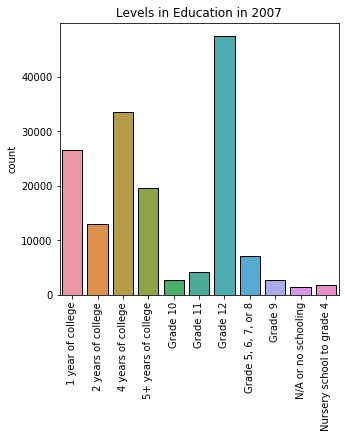

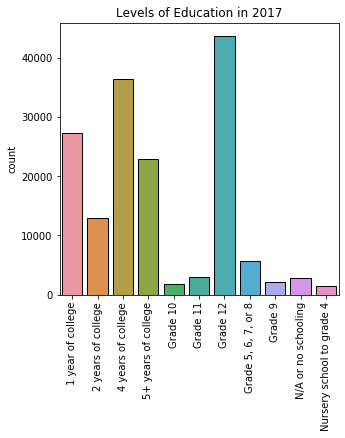

In [22]:
plt.figure(figsize=(5,5));
ax = sns.countplot(data_seven['educ'], order=np.unique(data_seven['educ']))
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);
ax.set_title('Levels in Education in 2007');

plt.figure(figsize=(5,5));
ax = sns.countplot(data_seventeen['educ'], order=np.unique(data_seventeen['educ']))
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);
ax.set_title('Levels of Education in 2017');

Do you see any changes in level of education between 2007 and 2017? If so, what are they?

#### Write your answer here

# Levels of Employment

Now let's visualize the different amount of people who were employed/unemployed between both years.

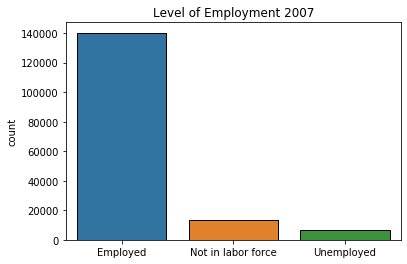

In [32]:
sns.countplot(y= data_seven['empstat'], order=np.unique(data_seven['empstat']))
plt.title('Level of Employment 2007');

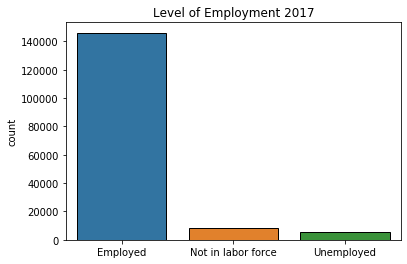

In [33]:
sns.countplot(data_seventeen['empstat'], order=np.unique(data_seventeen['empstat']))
plt.title('Level of Employment 2017');

# House Ownership Levels

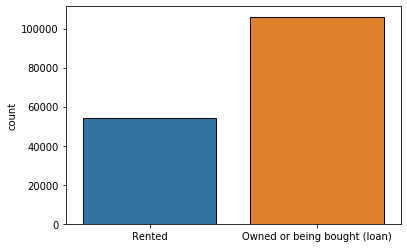

In [35]:
sns.countplot(data_seven['ownershp'])

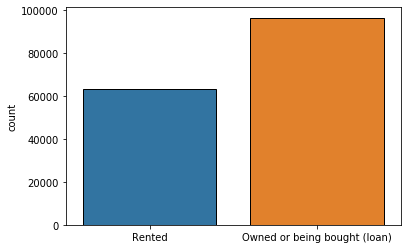

In [36]:
sns.countplot(data_seventeen['ownershp'])

# Amount of users enrolled in food stamp services

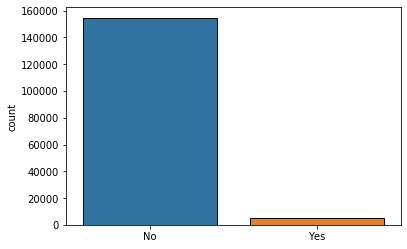

In [40]:
sns.countplot(data_seven['foodstmp'])

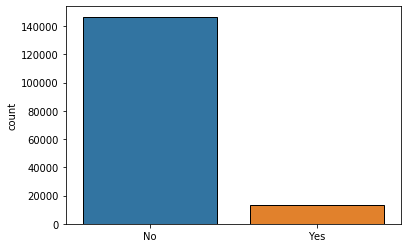

In [39]:
sns.countplot(data_seventeen['foodstmp'])

In [79]:
occupations = "0000 N/A (less than 16 years old/unemployed who never worked/NILF who last worked more than 5 years ago) Agriculture, Forestry, Fishing and Hunting, and Mining Agriculture, Forestry, Fishing, and Hunting 0170 Crop production 0180 Animal production and aquaculture 0190 Forestry except logging 0270 Logging 0280 Fishing, hunting and trapping 0290 Support activities for agriculture and forestry Mining, Quarrying, and Oil and Gas Extraction 0370 Oil and gas extraction 0380 Coal mining 0390 Metal ore mining 0470 Nonmetallic mineral mining and quarrying 0490 Support activities for mining Construction 0770 Construction (the cleaning of buildings and dwellings is incidental during construction and immediately after construction) Manufacturing 1070 Animal food, grain and oilseed milling 1080 Sugar and confectionery products 1090 Fruit and vegetable preserving and specialty food manufacturing 1170 Dairy product manufacturing 1180 Animal slaughtering and processing 1190 Retail bakeries 1270 Bakeries and tortillerias, except retail bakeries 1280 Seafood and other miscellaneous foods, n.e.c. 1290 Not specified food industries 1370 Beverage manufacturing 1390 Tobacco manufacturing 1470 Fiber, yarn, and thread mills 1480 Fabric mills, except knitting mills 1490 Textile and fabric finishing and coating mills 1570 Carpet and rug mills 1590 Textile product mills, except carpets and rugs 1670 Knitting fabric mills, and apparel knitting mills 1680 Cut and sew apparel manufacturing 1690 Apparel accessories and other apparel manufacturing 1770 Footwear manufacturing 1790 Leather tanning and finishing, and other allied products manufacturing 1870 Pulp, paper, and paperboard mills 1880 Paperboard container manufacturing 1890 Miscellaneous paper and pulp products 1990 Printing and related support activities 2070 Petroleum refining 2090 Miscellaneous petroleum and coal products 2170 Resin, synthetic rubber, and fibers and filaments manufacturing 2180 Agricultural chemical manufacturing 2190 Pharmaceutical and medicine manufacturing 2270 Paint, coating, and adhesive manufacturing 2280 Soap, cleaning compound, and cosmetics manufacturing 2290 Industrial and miscellaneous chemicals 2370 Plastics product manufacturing 2380 Tire manufacturing 2390 Rubber products, except tires, manufacturing 2470 Pottery, ceramics, and plumbing fixture manufacturing 2480 Clay building material and refractories manufacturing 2490 Glass and glass product manufacturing 2570 Cement, concrete, lime, and gypsum product manufacturing 2590 Miscellaneous nonmetallic mineral product manufacturing 2670 Iron and steel mills and steel product manufacturing 2680 Aluminum production and processing 2690 Nonferrous metal (except aluminum) production and processing 2770 Foundries 2780 Metal forgings and stampings 2790 Cutlery and hand tool manufacturing 2870 Structural metals, and boiler, tank, and shipping container manufacturing 2880 Machine shops; turned product; screw, nut and bolt manufacturing 2890 Coating, engraving, heat treating and allied activities 2970 Ordnance 2980 Miscellaneous fabricated metal products manufacturing 2990 Not specified metal industries 3070 Agricultural implement manufacturing 3080 Construction, and mining and oil and gas field machinery manufacturing 3095 Commercial and service industry machinery manufacturing 3170 Metalworking machinery manufacturing 3180 Engine, turbine, and power transmission equipment manufacturing 3190 Machinery manufacturing, n.e.c. or not specified 3365 Computer and peripheral equipment manufacturing 3370 Communications, and audio and video equipment manufacturing 3380 Navigational, measuring, electromedical, and control instruments manufacturing 3390 Electronic component and product manufacturing, n.e.c. 3470 Household appliance manufacturing 3490 Electric lighting and electrical equipment manufacturing, and other electrical component manufacturing, n.e.c. 3570 Motor vehicles and motor vehicle equipment manufacturing 3580 Aircraft and parts manufacturing 3590 Aerospace products and parts manufacturing 3670 Railroad rolling stock manufacturing 3680 Ship and boat building 3690 Other transportation equipment manufacturing 3770 Sawmills and wood preservation 3780 Veneer, plywood, and engineered wood products 3790 Prefabricated wood buildings and mobile homes 3875 Miscellaneous wood products 3895 Furniture and related product manufacturing 3960 Medical equipment and supplies manufacturing 3970 Sporting and athletic goods, and doll, toy and game manufacturing 3980 Miscellaneous manufacturing, n.e.c. 3990 Not specified manufacturing industries Wholesale Trade 4070 Motor vehicle and motor vehicle parts and supplies merchant wholesalers 4080 Furniture and home furnishing merchant wholesalers 4090 Lumber and other construction materials merchant wholesalers 4170 Professional and commercial equipment and supplies merchant wholesalers 4180 Metals and minerals (except petroleum) merchant wholesalers 4195 Household appliances and electrical and electronic goods merchant wholesalers 4265 Hardware, and plumbing and heating equipment, and supplies merchant wholesalers 4270 Machinery, equipment, and supplies merchant wholesalers 4280 Recyclable material merchant wholesalers 4290 Miscellaneous durable goods merchant wholesalers 4370 Paper and paper products merchant wholesalers 4380 Drugs, sundries, and chemical and allied products merchant wholesalers 4390 Apparel, piece goods, and notions merchant wholesalers 4470 Grocery and related product merchant wholesalers 4480 Farm product raw material merchant wholesalers 4490 Petroleum and petroleum products merchant wholesalers 4560 Alcoholic beverages merchant wholesalers 4570 Farm supplies merchant wholesalers 4580 Miscellaneous nondurable goods merchant wholesalers 4585 Wholesale electronic markets and agents and brokers 4590 Not specified wholesale trade Retail Trade 4670 Automobile dealers 4680 Other motor vehicle dealers 4690 Automotive parts, accessories, and tire stores 4770 Furniture and home furnishings stores 4780 Household appliance stores 4795 Electronics stores 4870 Building material and supplies dealers 4880 Hardware stores 4890 Lawn and garden equipment and supplies stores 4970 Grocery stores 4980 Specialty food stores 4990 Beer, wine, and liquor stores 5070 Pharmacies and drug stores 5080 Health and personal care, except drug, stores 5090 Gasoline stations 5170 Clothing stores 5180 Shoe stores 5190 Jewelry, luggage, and leather goods stores 5275 Sporting goods, and hobby and toy stores 5280 Sewing, needlework, and piece goods stores 5295 Musical instrument and supplies stores 5370 Book stores and news dealers 5380 Department stores and discount stores 5390 Miscellaneous general merchandise stores 5470 Retail florists 5480 Office supplies and stationery stores 5490 Used merchandise stores 5570 Gift, novelty, and souvenir shops 5580 Miscellaneous retail stores 5590 Electronic shopping 5591 Electronic auctions 5592 Mail-order houses 5670 Vending machine operators 5680 Fuel dealers 5690 Other direct selling establishments 5790 Not specified retail trade Transportation and Warehousing, and Utilities Transportation and Warehousing 6070 Air transportation 6080 Rail transportation 6090 Water transportation 6170 Truck transportation 6180 Bus service and urban transit 6190 Taxi and limousine service 6270 Pipeline transportation 6280 Scenic and sightseeing transportation 6290 Services incidental to transportation 6370 Postal Service 6380 Couriers and messengers 6390 Warehousing and storage Utilities 0570 Electric power generation, transmission and distribution 0580 Natural gas distribution 0590 Electric and gas, and other combinations 0670 Water, steam, air-conditioning, and irrigation systems 0680 Sewage treatment facilities 0690 Not specified utilities Information 6470 Newspaper publishers 6480 Periodical, book, and directory publishers 6490 Software publishing 6570 Motion pictures and video industries 6590 Sound recording industries 6670 Broadcasting (except internet) 6672 Internet publishing and broadcasting and web search portals 6680 Wired telecommunications carriers 6690 Telecommunications, except wired telecommunications carriers 6695 Data processing, hosting, and related services 6770 Libraries and archives 6780 Other information services, except libraries and archives, and internet publishing and broadcasting and web search portals Finance and Insurance, and Real Estate and Rental and Leasing Finance and Insurance 6870 Banking and related activities 6880 Savings institutions, including credit unions 6890 Nondepository credit and related activities 6970 Securities, commodities, funds, trusts, and other financial investments 6990 Insurance carriers and related activities Real Estate and Rental and Leasing 7070 Real estate 7080 Automotive equipment rental and leasing 7170 Video tape and disk rental 7180 Other consumer goods rental 7190 Commercial, industrial, and other intangible assets rental and leasing Professional, Scientific, and Management, and Administrative, and Waste Management Services Professional, Scientific, and Technical Services 7270 Legal services 7280 Accounting, tax preparation, bookkeeping, and payroll services 7290 Architectural, engineering, and related services 7370 Specialized design services 7380 Computer systems design and related services 7390 Management, scientific, and technical consulting services 7460 Scientific research and development services 7470 Advertising, public relations, and related services 7480 Veterinary services 7490 Other professional, scientific, and technical services Management of companies and enterprises 7570 Management of companies and enterprises Administrative and support and waste management services 7580 Employment services 7590 Business support services 7670 Travel arrangements and reservation services 7680 Investigation and security services 7690 Services to buildings and dwellings (except cleaning during construction and immediately after construction) 7770 Landscaping services 7780 Other administrative and other support services 7790 Waste management and remediation services Educational Services, and Health Care and Social Assistance Educational Services 7860 Elementary and secondary schools 7870 Colleges, universities, and professional schools, including junior colleges 7880 Business, technical, and trade schools and training 7890 Other schools and instruction, and educational support services Health Care and Social Assistance 7970 Offices of physicians 7980 Offices of dentists 7990 Offices of chiropractors 8070 Offices of optometrists 8080 Offices of other health practitioners 8090 Outpatient care centers 8170 Home health care services 8180 Other health care services 8190 Hospitals 8270 Nursing care facilities (skilled nursing facilities) 8290 Residential care facilities, except skilled nursing facilities 8370 Individual and family services 8380 Community food and housing, and emergency services 8390 Vocational rehabilitation services 8470 Child day care services Arts, Entertainment, and Recreation, and Accommodation and Food Services Arts, Entertainment, and Recreation 8560 Performing arts, spectator sports, and related industries 8570 Museums, art galleries, historical sites, and similar institutions 8580 Bowling centers 8590 Other amusement, gambling, and recreation industries Accommodation and Food Services 8660 Traveler accommodation 8670 Recreational vehicle parks and camps, and rooming and boarding houses 8680 Restaurants and other food services 8690 Drinking places, alcoholic beverages Other Services, Except Public Administration 8770 Automotive repair and maintenance 8780 Car washes 8790 Electronic and precision equipment repair and maintenance 8870 Commercial and industrial machinery and equipment repair and maintenance 8880 Personal and household goods repair and maintenance 8970 Barber shops 8980 Beauty salons 8990 Nail salons and other personal care services 9070 Drycleaning and laundry services 9080 Funeral homes, and cemeteries and crematories 9090 Other personal services 9160 Religious organizations 9170 Civic, social, advocacy organizations, and grantmaking and giving services 9180 Labor unions 9190 Business, professional, political, and similar organizations 9290 Private households Public Administration 9370 Executive offices and legislative bodies 9380 Public finance activities 9390 Other general government and support 9470 Justice, public order, and safety activities 9480 Administration of human resource programs 9490 Administration of environmental quality and housing programs 9570 Administration of economic programs and space research 9590 National security and international affairs Active Duty Military 9670 U.S. Army 9680 U.S. Air Force 9690 U.S. Navy 9770 U.S. Marines 9780 U.S. Coast Guard 9790 U.S. Armed Forces, Branch Not Specified 9870 Military Reserves or National Guard 9920 Unemployed, last worked 5 years ago or earlier or never worked"
numbers = re.findall(r"\d+", occupations)
numbers = [int(i) for i in numbers]
descriptions = re.split(r'\d+', occupations)
occupations_dict = dict(zip(numbers, descriptions))

In [53]:
pd_data = data.to_df()

In [99]:
org_data= Table().from_df(pd_data.replace({'ind': occupations_dict}), keep_index=True)

In [103]:
org_data.show(1)

index,year,hhwt,statefip,countyfip,ownershp,hhincome,foodstmp,perwt,age,educ,empstat,labforce,occ,ind,uhrswork,wrklstwk,looking,inctot,incwage,poverty,pwcounty,racecat,hisp
0,2007,7,California,73,Rented,41800,No,6,17,Grade 11,Not in labor force,"No, not in the labor force",4030,"Recreational vehicle parks and camps, and rooming and b ...",20,Did not work,"No, did not look for work",600,600,6,0,White,No


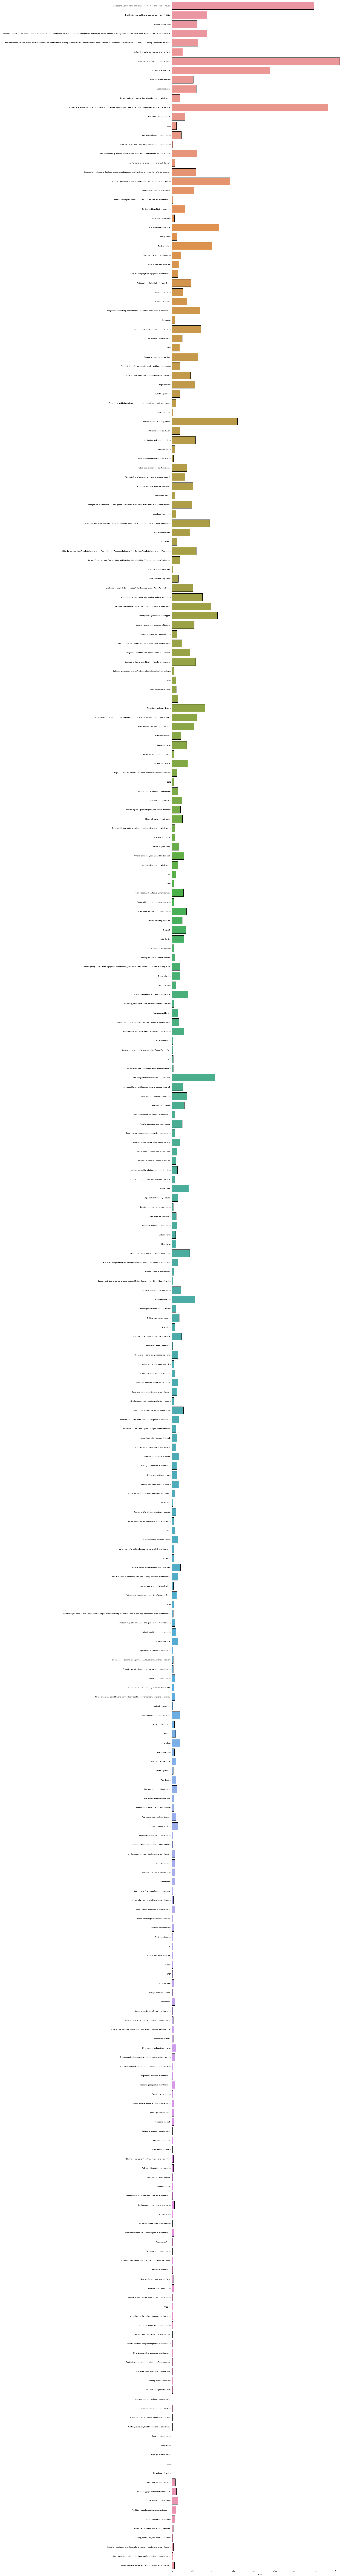

In [111]:
plt.figure(figsize=(20,300));
sns.countplot(y=org_data['ind'])